# Importaciones de bibliotecas
En este fragmento de código, se importan varias bibliotecas esenciales para el análisis de datos y la visualización en Python:

- `pandas`: Utilizada para la manipulación y análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- `numpy`: Aporta soporte para arrays y matrices grandes y multidimensionales, junto con una colección de funciones matemáticas para operar con estas estructuras de datos.
- `matplotlib.pyplot`: Proporciona una manera de visualizar datos. Se usa comúnmente para crear gráficos y visualizaciones estáticas, animadas e interactivas.
- `seaborn`: Basada en matplotlib, esta biblioteca proporciona una interfaz de alto nivel para la creación de gráficos estadísticos atractivos y más complejos de forma más sencilla.
- `scipy.stats.kstest`: Se utiliza para realizar la prueba de Kolmogorov-Smirnov, un test para comparar una muestra con una distribución de referencia o comparar dos muestras entre sí.
- `scipy.stats.mannwhitneyu`: Utilizada para realizar la prueba U de Mann-Whitney, una prueba no paramétrica para evaluar si dos muestras independientes provienen de la misma distribución.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import mannwhitneyu

# Carga de datos

Carga de catálogos extendidos y principales de quijote en diferentes frecuencias

In [54]:
data11 = pd.read_csv('../experiments/results/final_model/resultsqui11_ext_2.csv',sep=';')
data13 = pd.read_csv('../experiments/results/final_model/resultsqui13_ext_2.csv',sep=';')
data17 = pd.read_csv('../experiments/results/final_model/resultsqui17_ext_2.csv',sep=';')
data19 = pd.read_csv('../experiments/results/final_model/resultsqui19_ext_2.csv',sep=';')

data11_main = pd.read_csv('../experiments/results/final_model/resultsqui11_2.csv',sep=';')
data13_main = pd.read_csv('../experiments/results/final_model/resultsqui13_2.csv',sep=';')
data17_main = pd.read_csv('../experiments/results/final_model/resultsqui17_2.csv',sep=';')
data19_main = pd.read_csv('../experiments/results/final_model/resultsqui19_2.csv',sep=';')



## Asignación de frecuencia

A cada dataset se le asigna una variable indicando 

In [55]:
data11_main['map'] = 11
data13_main['map'] = 13
data17_main['map'] = 17
data19_main['map'] = 19

data11['map'] = 11
data13['map'] = 13
data17['map'] = 17
data19['map'] = 19

## Combinación de datasets

Se combinan los datasets de diferentes frecuencias  pertenecientes al mismo catálogo 

In [56]:
data_main = pd.concat([data11_main,data13_main,data17_main,data19_main])
data_ext = pd.concat([data11,data13,data17,data19])

## Asignación y combinación de catálogo

Se asigna a cada dataframe el catálogo al que pertenecen y se combinan en un único dataframe

In [57]:
data_ext['catalogue'] = 'ext'
data_main['catalogue'] = 'main'

data = pd.concat([data_ext,data_main])

In [58]:
data

,Unnamed: 0,name,media,std,map,catalogue
0,0.0,MFI-PSCe-001,0.332369,3.119217e-01,11,ext
1,1.0,MFI-PSCe-002,0.622591,3.777007e-01,11,ext
2,2.0,MFI-PSCe-006,0.849055,2.485586e-01,11,ext
3,3.0,MFI-PSCe-010,1.000000,6.419617e-08,11,ext
4,4.0,MFI-PSCe-018,0.691777,3.686925e-01,11,ext
...,...,...,...,...,...,...
38,NaN,MFI-PSCm-043,0.973116,1.246127e-01,19,main
39,NaN,MFI-PSCm-044,1.000000,1.685874e-08,19,main
40,NaN,MFI-PSCm-045,0.999999,3.786748e-06,19,main
41,NaN,MFI-PSCm-046,1.000000,0.000000e+00,19,main


In [59]:
errors = pd.read_csv('../datasets/quijote/errors.csv',sep=';')
errors_main = pd.read_csv('../datasets/quijote/errors_main.csv',sep=';')

In [60]:
errors = errors.drop(columns=['Unnamed: 0'],axis=1)
errors_main = errors_main.drop(columns=['Unnamed: 0'],axis=1)

errors = pd.concat([errors,errors_main])

In [61]:
catalogo = pd.read_csv('../datasets/quijote/catalogoQui.csv',sep=';')
catalogo2 = pd.read_csv('../datasets/quijote/catalogoQui2.csv',sep=';')

catalogo = pd.concat([catalogo,catalogo2])

In [62]:
catalogo = catalogo[['name','glat','glon','I 11 GHz','I 13 GHz','I 17 GHz','I 19 GHz']]

In [63]:
data = pd.merge(data,catalogo, on = 'name')
data = pd.merge(data,errors,on = 'name')

In [64]:
data

,Unnamed: 0,name,media,std,map,catalogue,glat,glon,I 11 GHz,I 13 GHz,I 17 GHz,I 19 GHz,I err 11 GHz,I err 13 GHz,I err 17 GHz,I err 19 GHz
0,0.0,MFI-PSCe-001,3.323687e-01,3.119217e-01,11,ext,81.650998,0.067999,0.364453,0.641314,0.771575,2.159666,0.346984,0.341067,0.864561,1.408277
1,0.0,MFI-PSCe-001,5.890981e-01,3.388324e-01,13,ext,81.650998,0.067999,0.364453,0.641314,0.771575,2.159666,0.346984,0.341067,0.864561,1.408277
2,0.0,MFI-PSCe-001,5.544814e-10,3.728083e-09,17,ext,81.650998,0.067999,0.364453,0.641314,0.771575,2.159666,0.346984,0.341067,0.864561,1.408277
3,0.0,MFI-PSCe-001,3.363640e-08,2.352622e-07,19,ext,81.650998,0.067999,0.364453,0.641314,0.771575,2.159666,0.346984,0.341067,0.864561,1.408277
4,1.0,MFI-PSCe-002,6.225905e-01,3.777007e-01,11,ext,65.919995,2.277004,1.033520,1.233625,2.210332,3.586987,0.338930,0.338627,0.617977,1.081900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,NaN,MFI-PSCm-046,1.000000e+00,0.000000e+00,19,main,-6.272001,123.138007,14.010341,13.943846,13.607360,14.710399,0.455927,0.486675,0.727236,1.149345
1420,NaN,MFI-PSCm-047,9.999930e-01,3.491346e-05,11,main,5.239000,106.970007,11.685849,11.955445,8.991669,11.031196,1.662562,1.673034,1.374901,1.954341
1421,NaN,MFI-PSCm-047,1.000000e+00,1.896140e-07,13,main,5.239000,106.970007,11.685849,11.955445,8.991669,11.031196,1.662562,1.673034,1.374901,1.954341
1422,NaN,MFI-PSCm-047,1.000000e+00,0.000000e+00,17,main,5.239000,106.970007,11.685849,11.955445,8.991669,11.031196,1.662562,1.673034,1.374901,1.954341


## Cálculo del SNR

El SNR se calcula diviendo la frecuencia entre el error en la medición, permitiendo conocer la intensidad de la fuente respecto al ruido de fondo

In [65]:
data['ratio11'] =data['I 11 GHz']/data['I err 11 GHz']
data['ratio13'] =data['I 13 GHz']/data['I err 13 GHz']
data['ratio17'] =data['I 17 GHz']/data['I err 17 GHz']
data['ratio19'] =data['I 19 GHz']/data['I err 19 GHz']

In [66]:
data11  = data.loc[data['map']==11]
data13 = data.loc[data['map']==13]
data17 = data.loc[data['map']==17]
data19 = data.loc[data['map']==19]

## Asignación de clasificación

Dependiendo del tipo de clasificación se asignará un valor a la variable "OK", que podrá adoptar 3 valores:

- OK_ext: se ha detectado fuente en un registro del catálogo extendido
- KO_ext: no se ha detectado fuente en un registro del catálogo extendido
- main: el registro pertenece al catálogo principal, en este caso se tratará independientemente de si esa fuente se ha detectado o no

In [67]:
def categorize(row):
    if row['catalogue'] == 'main':
        return 'main'
        
    elif row['catalogue'] == 'ext':
        if row['media'] > 0.5:
            return 'OK_ext'
        else:
            return 'KO_ext'
    else:
        return 'Unknown'

data11['OK'] = data11.apply(categorize,axis=1)
data13['OK'] = data13.apply(categorize,axis=1)
data17['OK'] = data17.apply(categorize,axis=1)
data19['OK'] = data19.apply(categorize,axis=1)


/tmp/ipykernel_1744/4203327177.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11['OK'] = data11.apply(categorize,axis=1)
/tmp/ipykernel_1744/4203327177.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data13['OK'] = data13.apply(categorize,axis=1)
/tmp/ipykernel_1744/4203327177.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

## Gráficos SNR vs I por frecuencia

En estos scatterplots se muestra cómo los registros que tienen un SNR menor son aquellos en los que no se ha detectado fuentes, mientras que aquellos con mayor SNR pertenecen al catálogo principal

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

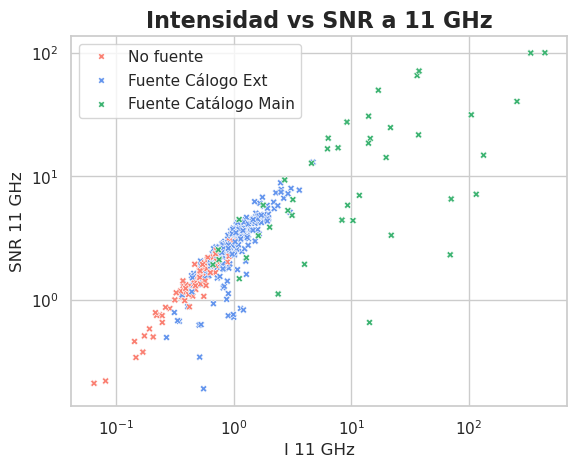

In [68]:


# Define el mapa de colores con los colores específicos para cada valor de 'OK'
palette_colors = {'KO_ext': 'salmon','OK_ext': 'cornflowerblue','main': 'mediumseagreen'}
sns.set(style="whitegrid", font='Arial')
# Crea el gráfico de dispersión usando Seaborn
scatter = sns.scatterplot(
    x='I 11 GHz', 
    y='ratio11', 
    data=data11, 
    hue='OK', 
    style='OK',  # Utiliza la columna 'OK' también para el estilo
    markers={'KO_ext': 'X', 'OK_ext': 'X', 'main': 'X'},  # Usa cruces para ambos, 0 y 1
    palette=palette_colors,
    s = 25  # Usa el mapa de colores definido
)
plt.xscale('log')
plt.yscale('log')
handles, labels = scatter.get_legend_handles_labels()
labels = ['No fuente', 'Fuente Cálogo Ext','Fuente Catálogo Main']
plt.legend(handles=handles, labels=labels)
plt.title('Intensidad vs SNR a 11 GHz',fontsize=16, fontweight='bold')
plt.ylabel('SNR 11 GHz')
plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

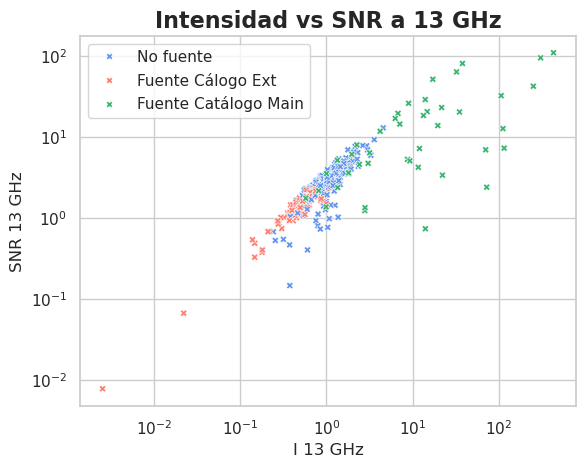

In [69]:
#Repetimos el codigo anterior para 13
scatter = sns.scatterplot(
    x='I 13 GHz', 
    y='ratio13', 
    data=data13, 
    hue='OK', 
    style='OK',  # Utiliza la columna 'OK' también para el estilo
    markers={'KO_ext': 'X', 'OK_ext': 'X', 'main': 'X'},  # Usa cruces para ambos, 0 y 1
    palette=palette_colors,
    s = 25  # Usa el mapa de colores definido
)
plt.xscale('log')
plt.yscale('log')

handles, labels = scatter.get_legend_handles_labels()
labels = ['No fuente', 'Fuente Cálogo Ext','Fuente Catálogo Main']
plt.legend(handles=handles, labels=labels)
plt.title('Intensidad vs SNR a 13 GHz',fontsize=16, fontweight='bold')
plt.ylabel('SNR 13 GHz')
plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

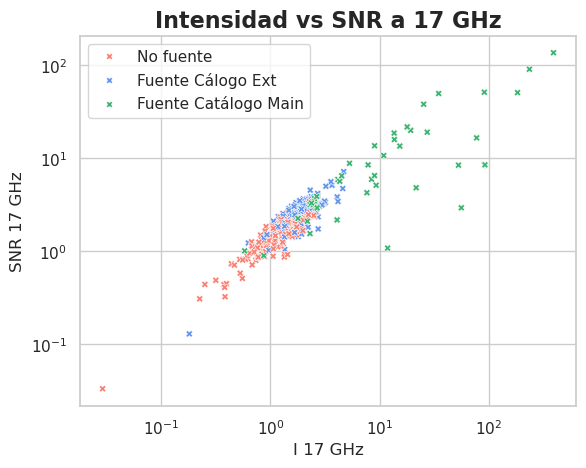

In [70]:
#Repetimos para 17

scatter = sns.scatterplot(
    x='I 17 GHz', 
    y='ratio17', 
    data=data17, 
    hue='OK', 
    style='OK',  # Utiliza la columna 'OK' también para el estilo
    markers={'KO_ext': 'X', 'OK_ext': 'X', 'main': 'X'},  # Usa cruces para ambos, 0 y 1
    palette=palette_colors,
    s = 25  # Usa el mapa de colores definido
)

plt.xscale('log')
plt.yscale('log')

handles, labels = scatter.get_legend_handles_labels()
labels = ['No fuente', 'Fuente Cálogo Ext','Fuente Catálogo Main']
plt.legend(handles=handles, labels=labels)
plt.title('Intensidad vs SNR a 17 GHz',fontsize=16, fontweight='bold')
plt.ylabel('SNR 17 GHz')
plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

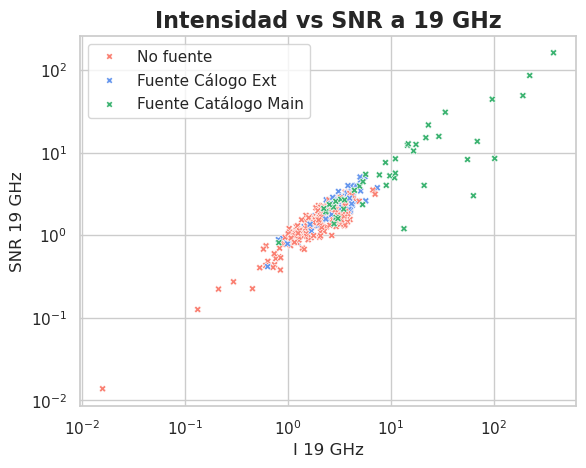

In [71]:
#Repetimos para 19

scatter = sns.scatterplot(
    x='I 19 GHz', 
    y='ratio19', 
    data=data19, 
    hue='OK', 
    style='OK',  # Utiliza la columna 'OK' también para el estilo
    markers={'KO_ext': 'X', 'OK_ext': 'X', 'main': 'X'},  # Usa cruces para ambos, 0 y 1
    palette=palette_colors,
    s = 25  # Usa el mapa de colores definido
)

plt.xscale('log')
plt.yscale('log')

handles, labels = scatter.get_legend_handles_labels()
labels = ['No fuente', 'Fuente Cálogo Ext','Fuente Catálogo Main']
plt.legend(handles=handles, labels=labels)
plt.title('Intensidad vs SNR a 19 GHz',fontsize=16, fontweight='bold')
plt.ylabel('SNR 19 GHz')
plt.show()

# Test estadísticos para SNR


## División de datos

Para comparar el SNR en los registros en los OKs y en los KOs se debe dividir el dataset por frecuencias y por clasifiación. En este caso solo se medirá en el catálogo extendido

In [72]:
data11_main = data11.loc[data11['OK'] == 'main']
data13_main = data13.loc[data13['OK'] == 'main']
data17_main = data17.loc[data17['OK'] == 'main']
data19_main = data19.loc[data19['OK'] == 'main']

data11_ok_ext = data11.loc[data11['OK'] == 'OK_ext']
data13_ok_ext = data13.loc[data13['OK'] == 'OK_ext']
data17_ok_ext = data17.loc[data17['OK'] == 'OK_ext']
data19_ok_ext = data19.loc[data19['OK'] == 'OK_ext']

data11_ko_ext = data11.loc[data11['OK'] == 'KO_ext']
data13_ko_ext = data13.loc[data13['OK'] == 'KO_ext']
data17_ko_ext = data17.loc[data17['OK'] == 'KO_ext']
data19_ko_ext = data19.loc[data19['OK'] == 'KO_ext']

data11_ko_test = data11_ko_ext.dropna(subset = 'ratio11')
data11_ok_test = data11_ok_ext.dropna(subset = 'ratio11')

data13_ok_test = data13_ok_ext.dropna(subset = ['ratio13'])
data13_ko_test= data13_ko_ext.dropna(subset = ['ratio13'])

data17_ok_test = data17_ok_ext.dropna(subset = ['ratio17'])
data17_ko_test= data17_ko_ext.dropna(subset = ['ratio17'])

data19_ok_test = data19_ok_ext.dropna(subset = ['ratio19'])
data19_ko_test= data19_ko_ext.dropna(subset = ['ratio19'])


## Test de normalidad

Primero se comprueba si el SNR sigue una distribución normal, lo que determinará que tipó de test se realizará más adelante

In [73]:
data11_ok_test

,Unnamed: 0,name,media,std,map,catalogue,glat,glon,I 11 GHz,I 13 GHz,...,I 19 GHz,I err 11 GHz,I err 13 GHz,I err 17 GHz,I err 19 GHz,ratio11,ratio13,ratio17,ratio19,OK
4,1.0,MFI-PSCe-002,0.622591,3.777007e-01,11,ext,65.919995,2.277004,1.033520,1.233625,...,3.586987,0.338930,0.338627,0.617977,1.081900,3.049359,3.643023,3.576724,3.315452,OK_ext
8,2.0,MFI-PSCe-006,0.849055,2.485586e-01,11,ext,80.499997,3.450999,0.398241,0.487968,...,2.081867,0.342696,0.345591,0.905658,1.435028,1.162081,1.411981,1.510880,1.450750,OK_ext
12,3.0,MFI-PSCe-010,1.000000,6.419617e-08,11,ext,73.065999,8.915001,1.796628,1.865137,...,2.387660,0.312850,0.356028,0.613367,1.411329,5.742783,5.238736,2.204015,1.691782,OK_ext
16,4.0,MFI-PSCe-018,0.691777,3.686925e-01,11,ext,61.745000,18.670003,1.435902,1.364170,...,3.049977,0.319983,0.308164,0.633610,1.129225,4.487439,4.426761,2.418188,2.700946,OK_ext
24,6.0,MFI-PSCe-023,1.000000,0.000000e+00,11,ext,-40.169009,21.428007,2.657224,2.340450,...,3.998136,0.398593,0.541286,1.161356,2.580069,6.666503,4.323869,2.353910,1.549624,OK_ext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,305.0,MFI-PSCe-702,0.678671,3.889948e-01,11,ext,39.639996,330.366004,0.760221,1.210734,...,3.025829,0.490002,0.493924,0.953600,1.731650,1.551465,2.451257,1.547470,1.747368,OK_ext
1224,306.0,MFI-PSCe-704,0.999998,9.333726e-06,11,ext,34.444997,333.282019,0.967356,1.193937,...,2.875703,0.410997,0.478233,1.017735,1.895554,2.353682,2.496557,2.445006,1.517077,OK_ext
1232,308.0,MFI-PSCe-713,1.000000,0.000000e+00,11,ext,70.165997,347.192998,2.517627,2.074217,...,1.987412,0.337099,0.320771,0.829773,1.299261,7.468515,6.466352,2.916817,1.529649,OK_ext
1236,309.0,MFI-PSCe-727,0.999990,5.544183e-05,11,ext,-33.263000,103.549000,1.708569,1.447650,...,2.869943,0.351682,0.339893,0.895778,1.416201,4.858278,4.259141,2.486333,2.026508,OK_ext


In [74]:
print(f' OK 11 GHz: {kstest(data11_ok_test["ratio11"],"norm").pvalue}')

print(f' KO 11 GHz: {kstest(data11_ko_test["ratio11"],"norm").pvalue}')

print(f' OK 13 GHz: {kstest(data13_ok_test["ratio13"],"norm").pvalue}')

print(f' KO 13 GHz: {kstest(data13_ko_test["ratio13"],"norm").pvalue}')

print(f' OK 17 GHz: {kstest(data17_ok_test["ratio17"],"norm").pvalue}')

print(f' KO 17 GHz: {kstest(data17_ko_test["ratio17"],"norm").pvalue}')

print(f' OK 19 GHz: {kstest(data19_ok_test["ratio19"],"norm").pvalue}')

print(f' KO 19 GHz: {kstest(data19_ko_test["ratio19"],"norm").pvalue}')



 OK 11 GHz: 1.27748894859808e-159
 KO 11 GHz: 1.517789115239306e-36
 OK 13 GHz: 7.520811306063419e-154
 KO 13 GHz: 4.324506120050976e-50
 OK 17 GHz: 9.416761827031895e-121
 KO 17 GHz: 5.269029600451229e-89
 OK 19 GHz: 4.5747513993153614e-66
 KO 19 GHz: 2.0189148859073514e-106


## Test U de Mann-Whitney

Como el SNR no sigue una distribución normal se debe realizar una inferencia no parámetrica. Se ha optado por el Test U de Mann-Whitney para comprobar que las distribuciones del SNR es diferente en los grupos OK y KO para una misma frecuencia

In [75]:

mannwhitneyu(data11_ko_test['ratio11'],data11_ok_test['ratio11'])

if mannwhitneyu(data11_ko_test['ratio11'],data11_ok_test['ratio11']).pvalue < 0.05:
    print('La distribucion de ratio11 es diferente en los dos grupos')
    if mannwhitneyu(data11_ko_test['ratio11'],data11_ok_test['ratio11']).pvalue < 0.01:
        print('La diferencia es muy significativa')

    if mannwhitneyu(data11_ko_test['ratio11'],data11_ok_test['ratio11']).pvalue < 0.001:
        print('La diferencia es extremadamente significativa')
        if (data11_ko_test['ratio11'].mean() > data11_ok_test['ratio11'].mean()):
            print('La media de ratio11 es mayor en el grupo de KO')
        else:
            print('La media de ratio11 es mayor en el grupo de OK')
else:
    print('La distribucion de ratio11 es igual en los dos grupos')







La distribucion de ratio11 es diferente en los dos grupos
La diferencia es muy significativa
La diferencia es extremadamente significativa
La media de ratio11 es mayor en el grupo de OK


In [76]:


mannwhitneyu(data13_ko_test['ratio13'],data13_ok_test['ratio13'])

if mannwhitneyu(data13_ko_test['ratio13'],data13_ok_test['ratio13']).pvalue < 0.05:
    print('La distribucion de ratio13 es diferente en los dos grupos')
    if mannwhitneyu(data13_ko_test['ratio13'],data13_ok_test['ratio13']).pvalue < 0.01:
        print('La diferencia es muy significativa')

    if mannwhitneyu(data13_ko_test['ratio13'],data13_ok_test['ratio13']).pvalue < 0.001:
        print('La diferencia es extremadamente significativa')
        if (data13_ko_test['ratio13'].mean() > data13_ok_test['ratio13'].mean()):
            print('La media de ratio13 es mayor en el grupo de KO')
        else:
            print('La media de ratio13 es mayor en el grupo de OK')
else:
    print('La distribucion de ratio13 es igual en los dos grupos')

La distribucion de ratio13 es diferente en los dos grupos
La diferencia es muy significativa
La diferencia es extremadamente significativa
La media de ratio13 es mayor en el grupo de OK


In [77]:


mannwhitneyu(data17_ko_test['ratio17'],data17_ok_test['ratio17'])

if mannwhitneyu(data17_ko_test['ratio17'],data17_ok_test['ratio17']).pvalue < 0.05:
    print('La distribucion de ratio17 es diferente en los dos grupos')
    if mannwhitneyu(data17_ko_test['ratio17'],data17_ok_test['ratio17']).pvalue < 0.01:
        print('La diferencia es muy significativa')

    if mannwhitneyu(data17_ko_test['ratio17'],data17_ok_test['ratio17']).pvalue < 0.001:
        print('La diferencia es extremadamente significativa')
        if (data17_ko_test['ratio17'].mean() > data17_ok_test['ratio17'].mean()):
            print('La media de ratio17 es mayor en el grupo de KO')
        else:
            print('La media de ratio17 es mayor en el grupo de OK')
else:
    print('La distribucion de ratio17 es igual en los dos grupos')

La distribucion de ratio17 es diferente en los dos grupos
La diferencia es muy significativa
La diferencia es extremadamente significativa
La media de ratio17 es mayor en el grupo de OK


In [78]:


mannwhitneyu(data19_ko_test['ratio19'],data19_ok_test['ratio19'])

if mannwhitneyu(data19_ko_test['ratio19'],data19_ok_test['ratio19']).pvalue < 0.05:
    print('La distribucion de ratio19 es diferente en los dos grupos')
    if mannwhitneyu(data19_ko_test['ratio19'],data19_ok_test['ratio19']).pvalue < 0.01:
        print('La diferencia es muy significativa')

    if mannwhitneyu(data19_ko_test['ratio19'],data19_ok_test['ratio19']).pvalue < 0.001:
        print('La diferencia es extremadamente significativa')
        if (data19_ko_test['ratio19'].mean() > data19_ok_test['ratio19'].mean()):
            print('La media de ratio19 es mayor en el grupo de KO')
        else:
            print('La media de ratio19 es mayor en el grupo de OK')
else:
    print('La distribucion de ratio19 es igual en los dos grupos')



La distribucion de ratio19 es diferente en los dos grupos
La diferencia es muy significativa
La diferencia es extremadamente significativa
La media de ratio19 es mayor en el grupo de OK


In [79]:
#Imprimimos los pvalores de todos los test


print(f'11 GHz: {mannwhitneyu(data11_ko_test["ratio11"],data11_ok_test["ratio11"]).pvalue}')

print(f'13 GHz: {mannwhitneyu(data13_ko_test["ratio13"],data13_ok_test["ratio13"]).pvalue}')

print(f'17 GHz: {mannwhitneyu(data17_ko_test["ratio17"],data17_ok_test["ratio17"]).pvalue}')

print(f'19 GHz: {mannwhitneyu(data19_ko_test["ratio19"],data19_ok_test["ratio19"]).pvalue}')


11 GHz: 4.205639791559041e-18
13 GHz: 4.093156513037427e-21
17 GHz: 1.039275775381697e-17
19 GHz: 6.354487775005688e-12


# Distribución del SNR por tipo de clasificación y frecuencia

En los siguientes gráficos se muestra como se distribuye el SNR dependiendo de si la clasifiación es un OK o un KO del catálogo externo o si es del catálogo principal. En estos histogramas se puede visualizar de otra manera la misma distribución del SNR que se muestra en los scatterplots anteriores

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

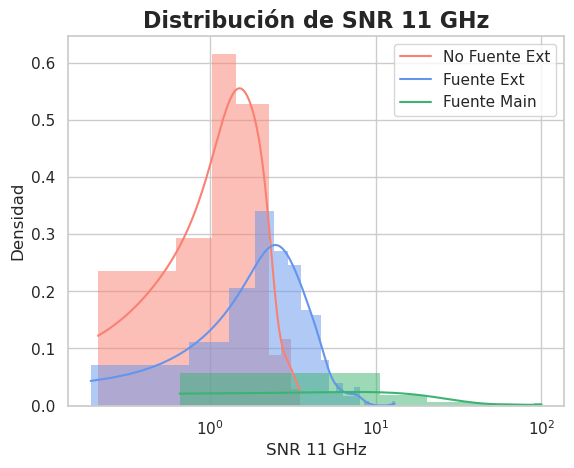

In [80]:


sns.set(style="whitegrid", font='Arial')

percentages_ko_ext = (data11_ko_ext['ratio11'].value_counts(normalize=True) * 100).sort_index()

percentages_ok_ext = (data11_ok_ext['ratio11'].value_counts(normalize=True) * 100).sort_index()

percentages_main = (data11_main['ratio11'].value_counts(normalize=True) * 100).sort_index()

sns.histplot(data=data11_ko_ext['ratio11'], color='salmon', label='KO', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data11_ok_ext['ratio11'], color='cornflowerblue', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data11_main['ratio11'], color='mediumseagreen', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

handles, labels = scatter.get_legend_handles_labels()

labels = ['No Fuente Ext', 'Fuente Ext', 'Fuente Main']

plt.legend(labels=labels)

plt.xlabel('SNR 11 GHz')

plt.ylabel('Densidad')

plt.xscale('log')

plt.title('Distribución de SNR 11 GHz',fontsize=16, fontweight='bold')

plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

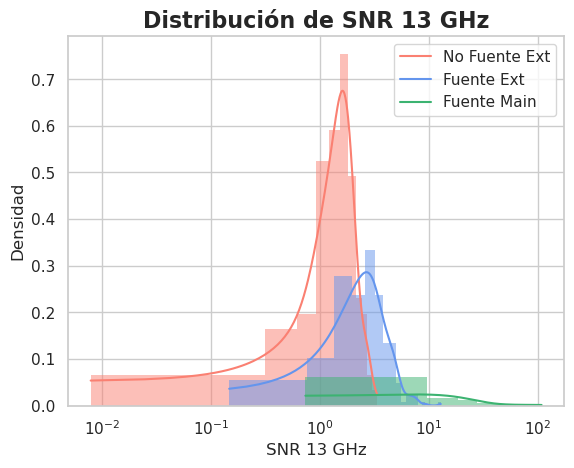

In [81]:
# Repetimos para 13

sns.set(style="whitegrid", font='Arial')

percentages_ko_ext = (data13_ko_ext['ratio13'].value_counts(normalize=True) * 100).sort_index()

percentages_ok_ext = (data13_ok_ext['ratio13'].value_counts(normalize=True) * 100).sort_index()

percentages_main = (data13_main['ratio13'].value_counts(normalize=True) * 100).sort_index()

sns.histplot(data=data13_ko_ext['ratio13'], color='salmon', label='KO', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data13_ok_ext['ratio13'], color='cornflowerblue', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data13_main['ratio13'], color='mediumseagreen', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

handles, labels = scatter.get_legend_handles_labels()

labels = ['No Fuente Ext', 'Fuente Ext', 'Fuente Main']

plt.legend(labels=labels)

plt.xlabel('SNR 13 GHz')

plt.ylabel('Densidad')

plt.xscale('log')

plt.title('Distribución de SNR 13 GHz',fontsize=16, fontweight='bold')

plt.show()



findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

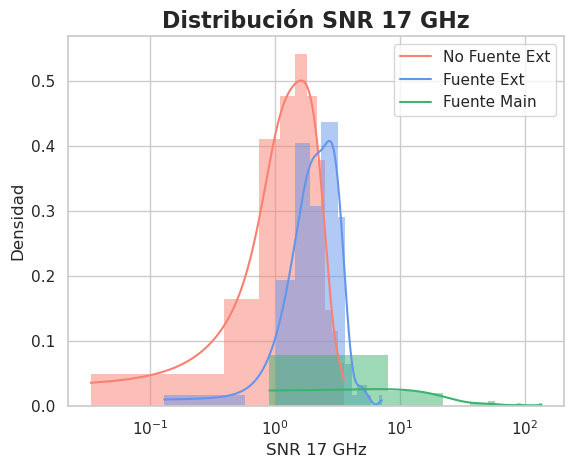

In [82]:
#Repetimos para 17 


sns.set(style="whitegrid", font='Arial')

percentages_ko_ext = (data17_ko_ext['ratio17'].value_counts(normalize=True) * 100).sort_index()

percentages_ok_ext = (data17_ok_ext['ratio17'].value_counts(normalize=True) * 100).sort_index()

percentages_main = (data17_main['ratio17'].value_counts(normalize=True) * 100).sort_index()

sns.histplot(data=data17_ko_ext['ratio17'], color='salmon', label='KO', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data17_ok_ext['ratio17'], color='cornflowerblue', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data17_main['ratio17'], color='mediumseagreen', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

handles, labels = scatter.get_legend_handles_labels()

labels = ['No Fuente Ext', 'Fuente Ext', 'Fuente Main']

plt.legend(labels=labels)

plt.xlabel('SNR 17 GHz')

plt.ylabel('Densidad')

plt.xscale('log')

plt.title('Distribución SNR 17 GHz',fontsize=16, fontweight='bold')

plt.show()




findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

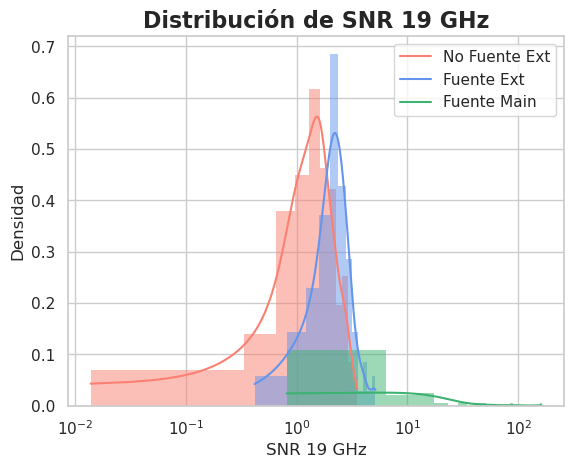

In [83]:
#Repetimos para 19

sns.set(style="whitegrid", font='Arial')

percentages_ko_ext = (data19_ko_ext['ratio19'].value_counts(normalize=True) * 100).sort_index()

percentages_ok_ext = (data19_ok_ext['ratio19'].value_counts(normalize=True) * 100).sort_index()

percentages_main = (data19_main['ratio19'].value_counts(normalize=True) * 100).sort_index()

sns.histplot(data=data19_ko_ext['ratio19'], color='salmon', label='KO', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data19_ok_ext['ratio19'], color='cornflowerblue', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

sns.histplot(data=data19_main['ratio19'], color='mediumseagreen', label='OK', alpha=0.5, kde=True, linewidth=0, stat="density")

handles, labels = scatter.get_legend_handles_labels()

labels = ['No Fuente Ext', 'Fuente Ext', 'Fuente Main']

plt.legend(labels=labels)

plt.xlabel('SNR 19 GHz')

plt.ylabel('Densidad')

plt.xscale('log')

plt.title('Distribución de SNR 19 GHz',fontsize=16, fontweight='bold')

plt.show()
